In [3]:
import pymongo
import pandas as pd
#from pandas import Series
import numpy as np
#import matplotlib.pyplot as plt
#from collections import Counter
#from bson.objectid import ObjectId
import pprint

In [4]:
client = pymongo.MongoClient('localhost',27017)
#client = pymongo.MongoClient('localhost',32768)
db = client.bandhub

In [5]:
songCol = db.get_collection('songsStream')
vidCol = db.get_collection('mergedVideos')
trackCol = db.get_collection('tracksStream')
postCol = db.get_collection('posts')
[songCol.count(), vidCol.count(), trackCol.count(), postCol.count()]

[425706, 198169, 350000, 494867]

In [5]:
songId = []
postId = []
vidId = []

In [6]:
cursor = songCol.find({'access' : 1})
i = 0
for docs in cursor:
    i = i+1
    songId.append(docs['_id'])
print(i)

418465


In [21]:
cursor = songCol.find({'access' : 1}).skip(250000).limit(250000)
for docs in cursor:
    i = i+1
    songId.append(docs['_id'])
#try:
#    cursor.next
#except StopException:
#    print('done')
print(i)

418465


In [22]:
len(songId)
#len(postId)
#len(vidId)

418465

In [4]:
pubTrackDur = []
for Id in songId:
    pointer = trackCol.find({'objectId' : Id})
    for docs in pointer:
        pubTrackDur.append(docs['durationInSeconds'])
    pointer = trackCol.find({'objectId' : Id})
    for docs in pointer:
        pubTrackDur.append(docs['durationInSeconds'])
        
df = pd.DataFrame(pubTrackDur)
ax = df[(df<1000) & (df >= 0)].plot(kind='hist',grid=True,figsize=(10,10),bins = 1000)
ax.set(xlabel="Duration in seconds", ylabel="Number of mixes")

NameError: name 'songId' is not defined

In [32]:
pprint.pprint(postId.count())

AutoReconnect: connection closed

In [7]:
pointer = postCol.find({'songAccess':{'$exists': True}}, {'songAccess':1 ,'hasRecordedTracks':1, '_id':0})
count = 0
for docs in pointer:
    if(docs['songAccess'] == 1):
        count = count + 1
pprint.pprint(count)

408353


In [6]:
pointer = vidCol.find()[1:2]
for docs in pointer:
    pprint.pprint(docs)

{u'_id': ObjectId('52ea66f7e4b0a865287a1350'),
 u'mp4MergedVideoUrl': u'https://bandhubmediastream.blob.core.windows.net/files/f-52da0a1a9cec8fdf0b000009.mp4',
 u'oggMergedVideoUrl': u'https://bandhubmediastream.blob.core.windows.net/files/f-52da0a1a9cec8fdf0b000009.ogg',
 u'songId': ObjectId('52da0a1a9cec8fdf0b000009'),
 u'trackIds': [ObjectId('52e9c8de852f85f52900001f')]}


[Text(0,0.5,u'Number of mixes'), Text(0.5,0,u'Duration in seconds')]

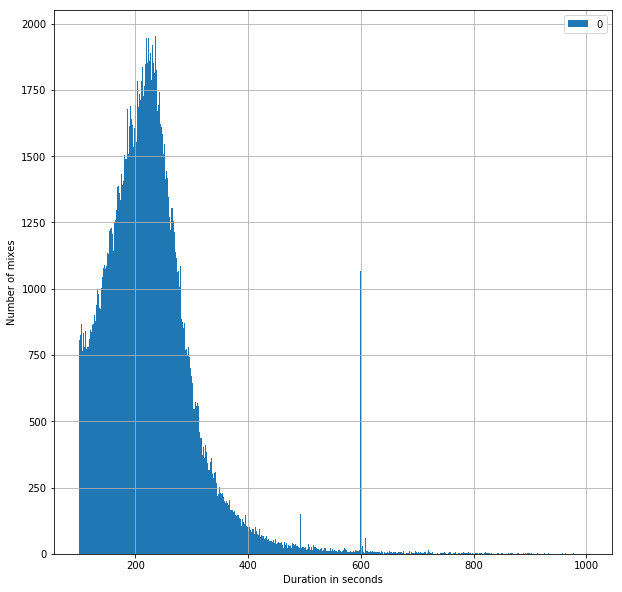

In [8]:
trackDurList = []
pointer = trackCol.find({'durationInSeconds':{'$exists': True}}, {'durationInSeconds':1 , '_id':0})
for docs in pointer:
    myList.append(docs['durationInSeconds']) 

#pointer.next


df = pd.DataFrame(myList)
ax = df[(df<1000) & (df >= 0)].plot(kind='hist',grid=True,figsize=(10,10),bins = 1000)
ax.set(xlabel="Duration in seconds", ylabel="Number of mixes")


In [22]:
ytList = []
#pointer = trackCol.find({'sourceVideoURL':{'$exists': True}}, {'sourceVideoURL':1 , '_id':0})
pointer = trackCol.find({'sourceVideoURL':1 , '_id':0})

In [23]:
count1 = 0
count0 = 0
for docs in pointer:
    if docs.get('sourceVideoURL') is None:
        ytList.append(0)
        count0 = count0 + 1
    else:
        ytList.append(1)
        count1 = count1 + 1
print(count0)
print(count1)

0
0


In [ ]:
df = pd.DataFrame(ytList)
ax = df.plot(kind='bar',grid=True,figsize=(10,10),xticks=range(2)).set(ylabel="Number of published tracks", xlabel="0 - Not YouTube, 1 - From YouTube")

In [ ]:
pubTracks = []
ytList = []
for Id in songId:
    pointer = trackCol.find({'objectId' : Id}).skip(250000).limit(250000)
    for docs in pointer:
        pubTracks.append(docs['durationInSeconds'])
        if docs['sourceVideoURL'] == None:
            ytList.append(0)
        else:
            ytList.append(1)
        
df = pd.DataFrame(pubTracks)
ax = df[(df<1000) & (df >= 0)].plot(kind='hist',grid=True,figsize=(10,10),bins = 1000)
ax.set(xlabel="Duration in seconds", ylabel="Number of mixes")

In [40]:
TracksPerMix = []
#zeroTrackMixes = 0
pubTracks = postCol.find({'songAccess':{'$exists': True}}, {'participantsInfo':1 ,'songAccess':1, '_id':0})
for docs in pubTracks:
    if(docs['songAccess'] == 1):
        TracksPerMix.append(len(docs['participantsInfo']['publishedTracks']))
TracksPerMixList = sorted(list(set(TracksPerMix)))
sorted(zip(TracksPerMixList, np.bincount([TracksPerMixList.index(i) for i in TracksPerMix])), key=lambda x:-x[1])

[(0, 244396),
 (1, 130482),
 (2, 8014),
 (3, 3908),
 (4, 3571),
 (6, 3165),
 (5, 3136),
 (7, 2661),
 (8, 2144),
 (9, 1891),
 (10, 1271),
 (11, 1020),
 (12, 758),
 (13, 484),
 (14, 372),
 (15, 292),
 (16, 185),
 (17, 141),
 (18, 121),
 (19, 78),
 (20, 52),
 (21, 38),
 (22, 32),
 (23, 27),
 (24, 20),
 (25, 18),
 (27, 17),
 (26, 14),
 (28, 8),
 (30, 8),
 (29, 5),
 (31, 5),
 (33, 5),
 (40, 4),
 (35, 2),
 (36, 2),
 (32, 1),
 (34, 1),
 (42, 1),
 (47, 1),
 (57, 1),
 (65, 1)]

In [45]:
pointer = postCol.find()({'collabSettings':{'$exists': True}}, {'collabSettings':1, '_id':0})
for docs in pointer:
    pprint.pprint(docs)

TypeError: 'Cursor' object is not callable

In [16]:
pointer = postCol.find()[5:6]
for docs in pointer:
    pprint.pprint(docs)

{u'_id': ObjectId('546f05de4e5d9e60267e62dd'),
 u'activities': [{u'timestamp': datetime.datetime(2014, 3, 30, 16, 36, 55),
                  u'type': u'newcomment',
                  u'userId': ObjectId('533841bf228ae7d71500004d'),
                  u'username': u'Sietesoles'},
                 {u'timestamp': datetime.datetime(2014, 3, 30, 16, 36, 55),
                  u'type': u'newcomment',
                  u'userId': ObjectId('533841bf228ae7d71500004d'),
                  u'username': u'Sietesoles'},
                 {u'timestamp': datetime.datetime(2014, 3, 30, 16, 36, 55),
                  u'type': u'newcomment',
                  u'userId': ObjectId('533841bf228ae7d71500004d'),
                  u'username': u'Sietesoles'},
                 {u'timestamp': datetime.datetime(2014, 3, 30, 16, 36, 55),
                  u'type': u'newcomment',
                  u'userId': ObjectId('533841bf228ae7d71500004d'),
                  u'username': u'Sietesoles'},
                 {u'times

In [8]:
pointer = trackCol.find()[88:89]
for docs in pointer:
    pprint.pprint(docs)

{u'_id': ObjectId('520c0d873004aac9f04d4353'),
 u'audioChannels': [{u'audioSampleRate': 44100,
                     u'audioTotalFrames': 6912448,
                     u'fileForAudioGraphUrl': u'http://bandhubwebmedia1.blob.core.windows.net/files/520c0d243004aac9f04d4351-520c0d873004aac9f04d4353.ogg',
                     u'fileUrl': u'http://bandhubwebmedia1.blob.core.windows.net/files/520c0d243004aac9f04d4351-520c0d873004aac9f04d4353.ogg',
                     u'partsInfo': [{u'audioPartUrl': u'http://bandhubwebmedia9.blob.core.windows.net/files/520c0d243004aac9f04d4351-520c0d873004aac9f04d4353-001.ogg',
                                     u'partIndex': 0,
                                     u'startSecs': 0},
                                    {u'audioPartUrl': u'http://bandhubwebmedia0.blob.core.windows.net/files/520c0d243004aac9f04d4351-520c0d873004aac9f04d4353-002.ogg',
                                     u'partIndex': 1,
                                     u'startSecs': 16},


In [16]:
pointer = songCol.find()[1:10]
for docs in pointer:
    pprint.pprint(docs)

{u'_id': ObjectId('520bf93f3004aac9f04d42d6'),
 u'access': 2,
 u'dateLastModified': datetime.datetime(2013, 10, 9, 3, 1, 7, 340000),
 u'description': u'',
 u'fbImage': u'http://bandhubmediastream.blob.core.windows.net/files/ct-520bf93f3004aac9f04d42d6-1.png',
 u'fbImageTracks': [u'520bf9463004aac9f04d42d7',
                    u'520bf94c3004aac9f04d42d8',
                    u'520bf9513004aac9f04d42d9',
                    u'520bf9563004aac9f04d42da'],
 u'hasRecordedTracks': True,
 u'isFeatured': False,
 u'masterSongId': ObjectId('522a1c8a6310675e32000032'),
 u'migratedToAzure': True,
 u'mp4MergedMobileVideoUrl': u'http://bandhubmediastream.blob.core.windows.net/files/m-f-8f3c876d-03ec-4c76-a3b6-1108ed8d749a.mp4',
 u'mp4MergedVideoUrl': u'http://bandhubmediastream.blob.core.windows.net/files/f-520bf93f3004aac9f04d42d6.mp4',
 u'newSearchIndexChecked': True,
 u'numberOfViews': 4,
 u'oggMergedVideoUrl': u'http://bandhubmediastream.blob.core.windows.net/files/f-520bf93f3004aac9f04d42d6.ogg

In [6]:
pointer = vidCol.find()[5]
for docs in pointer:
    pprint.pprint(docs)

u'mp4MergedVideoUrl'
u'oggMergedVideoUrl'
u'songId'
u'_id'
u'trackIds'


In [27]:
#pointer = songCol.find()[15:16]
genreList = []
genre = songCol.find({'channels':{'$exists': True}}, {'channels':1 , '_id':0})
count = 0
for docs in genre:
    count = count + 1
    if len(docs['channels'])>0:
        genreList.append(docs['channels']) 
#pprint.pprint(genreList)

In [12]:
#pointer = songCol.find()[15:16]
genre_set = set()
for g in genreList:
    for _g in g:
        genre_set.add(_g)

In [13]:
len(genre_set)

46

In [15]:
genre.count()

1199

In [19]:
cursor = trackCol.find({'instrumentAssignedBySongOwner' : {'$exists' : True}})
myList = []
for doc in cursor:
    myList.append(doc['instrumentAssignedBySongOwner'])

In [21]:
len(set(myList))

23

In [25]:
instrument_set = list(set(myList))

In [29]:
sorted(zip(instrument_set, np.bincount([instrument_set.index(i) for i in myList])), key=lambda x:-x[1])

[(u'lead-vocals', 450),
 (u'rhythm-guitar', 358),
 (u'bass', 316),
 (u'lead-guitar', 276),
 (u'backing-vocals', 234),
 (u'drums', 228),
 (u'keys-piano', 143),
 (u'percussion', 133),
 (u'mixing', 35),
 (u'synth-effects', 24),
 (u'sax', 20),
 (u'trumpet', 12),
 (u'harmonica', 9),
 (u'flute', 8),
 (u'harp', 6),
 (u'ukulele', 4),
 (u'turntable', 3),
 (u'violin', 2),
 (u'clarinet', 2),
 (u'banjo', 2),
 (u'cello', 2),
 (u'accordion', 1),
 (u'pedal-steel-guitar', 1)]

In [25]:
cursor = trackCol.find({'durationInSeconds':{'$exists': True}}, {'durationInSeconds':1 , '_id':0})
for doc in cursor[1:10]:
    pprint.pprint(doc)

{u'durationInSeconds': 175.5675354003906}
{u'durationInSeconds': 215.087890625}
{u'durationInSeconds': 9.707391738891602}
{u'durationInSeconds': 9.150113105773926}
{u'durationInSeconds': 9.126893043518066}
{u'durationInSeconds': 190.9159240722656}
{u'durationInSeconds': 8.825034141540527}
{u'durationInSeconds': 138.3227233886719}
{u'durationInSeconds': 127.3164596557617}


In [ ]:
pointer = trackCol.find({'durationInSeconds':{'$exists': True}}, {'durationInSeconds':1 , '_id':0})
for docs in 